In [11]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

with open("./affected_indices.pkl", "rb") as f:
    dictv = pickle.load(f)

In [12]:
all_arrays = list(dictv.values())
common_elements = set(all_arrays[0])
for arr in all_arrays[1:]:
    common_elements.intersection_update(arr)
common_elements = np.array(list(common_elements))  # Convert to numpy array if needed

print("Common elements across all arrays:", common_elements)

Common elements across all arrays: [1540  646 1545 2858 1706 2925 2832 2801 1682  760 2840 2838 1976 2842
 1693]


In [13]:
keys=list(dictv.keys())
mainlen=len(dictv[keys[0]])
mainlen

316

In [14]:
common_counts = {}
for i in range(1, len(keys)):
    key1, key2 = keys[i - 1], keys[i]
    arr1, arr2 = dictv[key1], dictv[key2]
    common_count = len(set(arr1).intersection(arr2))
    common_counts[(key1, key2)] = common_count/mainlen

print("Common element counts between subsequent keys:", common_counts)

Common element counts between subsequent keys: {(1, 50): 0.9145569620253164, (50, 100): 0.15822784810126583, (100, 200): 0.629746835443038, (200, 300): 0.620253164556962, (300, 500): 0.6487341772151899, (500, 600): 0.7215189873417721, (600, 700): 0.7911392405063291, (700, 1208): 0.49050632911392406}


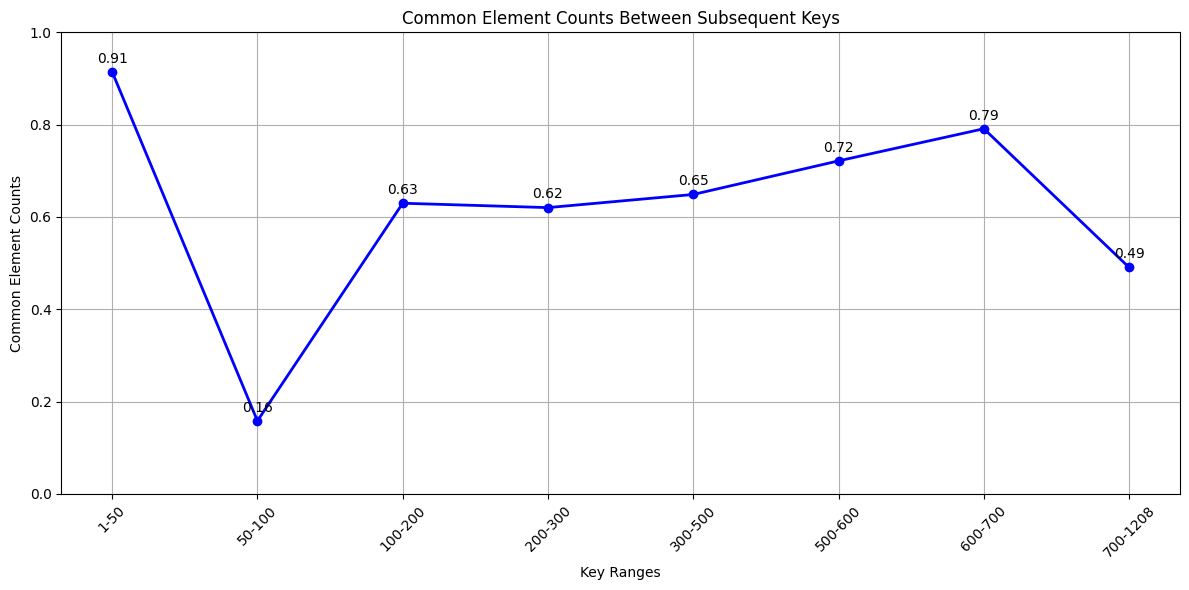

In [20]:
import matplotlib.pyplot as plt

x_labels = [f"{k1}-{k2}" for (k1, k2) in common_counts.keys()]
y_values = list(common_counts.values())

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(x_labels, y_values, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)

# Add labels and title
plt.xlabel('Key Ranges')
plt.ylabel('Common Element Counts')
plt.title('Common Element Counts Between Subsequent Keys')

# Annotate each point with its value for better readability
for i, (x, y) in enumerate(zip(x_labels, y_values)):
    plt.text(x, y + 0.02, f"{y:.2f}", ha='center', color='black')

# Show plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 1)
plt.show()


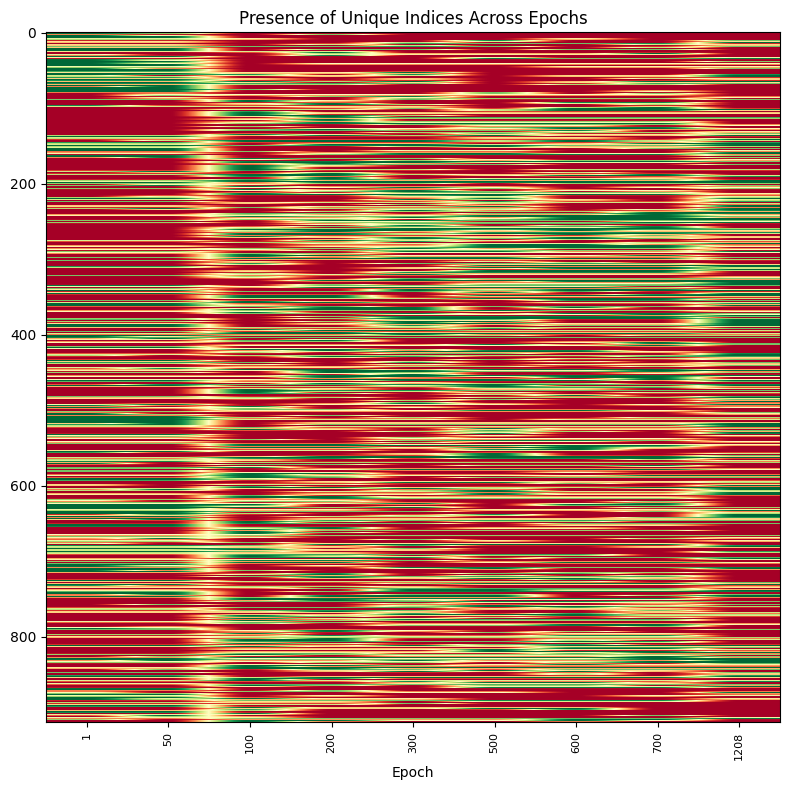

In [28]:
# %%
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Load the data
with open("./affected_indices.pkl", "rb") as f:
    dictv = pickle.load(f)

# Get all unique indices across all epochs
unique_indices = sorted(set(idx for indices in dictv.values() for idx in indices))
index_to_row = {idx: i for i, idx in enumerate(unique_indices)}  # Map each unique index to a row

# Get epochs as discrete bins for x-axis
epochs = list(dictv.keys())

# Initialize the heatmap matrix
heatmap_data = np.zeros((len(unique_indices), len(epochs)), dtype=int)

# Populate the heatmap matrix
for col, epoch in enumerate(epochs):
    indices = dictv[epoch]
    for idx in indices:
        row = index_to_row[idx]  # Find the row for this index
        heatmap_data[row, col] = 1  # Set to 1 if present in this epoch

# Plot the heatmap with a smaller and square layout
plt.figure(figsize=(8, 8))  # Adjust for a smaller, square-like plot
plt.imshow(heatmap_data, aspect='auto', cmap='RdYlGn', origin='upper')

# Configure axis labels
plt.xlabel("Epoch", fontsize=10)
# plt.ylabel("Index", fontsize=10)
plt.title("Presence of Unique Indices Across Epochs", fontsize=12)

plt.xticks(ticks=np.arange(len(epochs)), labels=epochs, rotation=90, fontsize=8)
# plt.yticks(ticks=np.arange(len(unique_indices)), labels=unique_indices, fontsize=8)

# Show plot
plt.tight_layout()

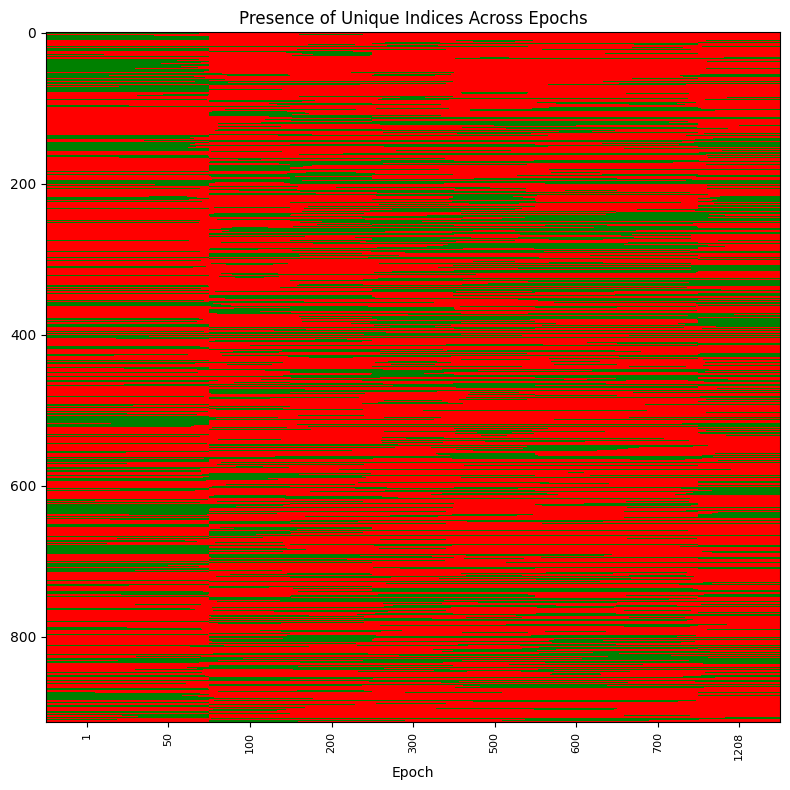

In [ ]:
# %%
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load the data
with open("./affected_indices.pkl", "rb") as f:
    dictv = pickle.load(f)

# Get all unique indices across all epochs
unique_indices = sorted(set(idx for indices in dictv.values() for idx in indices))
index_to_row = {idx: i for i, idx in enumerate(unique_indices)}  # Map each unique index to a row

# Get epochs as discrete bins for x-axis
epochs = list(dictv.keys())

# Initialize the heatmap matrix
heatmap_data = np.zeros((len(unique_indices), len(epochs)), dtype=int)

# Populate the heatmap matrix
for col, epoch in enumerate(epochs):
    indices = dictv[epoch]
    for idx in indices:
        row = index_to_row[idx]  # Find the row for this index
        heatmap_data[row, col] = 1  # Set to 1 if present in this epoch

# Define a discrete colormap with red for 0 and green for 1
cmap = ListedColormap(['red', 'green'])
plt.figure(figsize=(8, 8))
plt.imshow(heatmap_data, aspect='auto', cmap=cmap, origin='upper', vmin=0, vmax=1)

# Configure axis labels
plt.xlabel("Epoch", fontsize=10)
plt.ylabel("Index", fontsize=10)
plt.title("Presence of Unique Indices Across Epochs", fontsize=12)

# Set smaller x and y ticks
plt.xticks(ticks=np.arange(len(epochs)), labels=epochs, rotation=90, fontsize=8)
plt.tight_layout()
plt.show()
